<a href="https://colab.research.google.com/github/suyangegrong/pdm08/blob/main/project/pdm08_chest_xray_TL2_Resnet50_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chest X-ray dataset
- NORMAL
- PNEUMONIA 

## dataset
- chest_xray_data/val/PNEUMONIA 8
- chest_xray_data/val/NORMAL 8
- chest_xray_data/test/PNEUMONIA 390
- chest_xray_data/test/NORMAL 234
- chest_xray_data/train/PNEUMONIA 3875
- chest_xray_data/train/NORMAL 1341

In [1]:
# Down chest_xray_data.zip from Google drive
# https://drive.google.com/file/d/1rLbgIAsHLB-3OBR4mdhXQcBehz2qzVR2/view?usp=sharing
#!gdown https://drive.google.com/uc?id=1rLbgIAsHLB-3OBR4mdhXQcBehz2qzVR2&confirm=t
# When the above link does not work due to virus checking, use one of the below methods to download dataset.
# !wget http://life21c.inje.ac.kr:3030/data/chest_xray_data.zip
!wget http://chaos.inje.ac.kr:3030/data/chest_xray_data.zip


--2022-12-13 08:14:35--  http://chaos.inje.ac.kr:3030/data/chest_xray_data.zip
Resolving chaos.inje.ac.kr (chaos.inje.ac.kr)... 203.241.251.51
Connecting to chaos.inje.ac.kr (chaos.inje.ac.kr)|203.241.251.51|:3030... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1225713864 (1.1G) [application/zip]
Saving to: ‘chest_xray_data.zip’

chest_xray_data.zip 100%[===================>]   1.14G  7.98MB/s    in 6m 47s  

2022-12-13 08:21:23 (2.87 MB/s) - ‘chest_xray_data.zip’ saved [1225713864/1225713864]



In [2]:
!unzip chest_xray_data.zip   # -d chest_xray_data
# !unzip -q PetImages.zip -d PetImages

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: chest_xray_data/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray_data/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_

In [ ]:
!ls chest_xray_data

test  train  val


In [ ]:
import os
path = 'chest_xray_data'
# 서브 디렉토리별 파일 개수 출력
for root, subdirs, files in os.walk(path):
    if len(files) > 0:
        print(root, len(files))

chest_xray_data/train/PNEUMONIA 3875
chest_xray_data/train/NORMAL 1341
chest_xray_data/test/PNEUMONIA 390
chest_xray_data/test/NORMAL 234
chest_xray_data/val/PNEUMONIA 8
chest_xray_data/val/NORMAL 8


In [ ]:
# import
import matplotlib.pyplot as plt 
from matplotlib.image import imread

import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
import seaborn as sns
import glob
import cv2
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Dropout,LeakyReLU,GlobalAveragePooling2D
from keras.optimizers import Adam,RMSprop
from keras.losses import BinaryCrossentropy
from keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.callbacks import EarlyStopping
from tensorflow.keras import models, layers

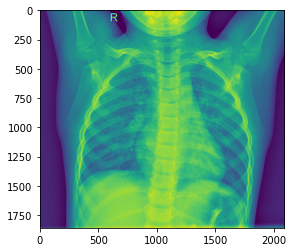

In [ ]:
# sample image
image = imread('chest_xray_data/train/NORMAL/IM-0115-0001.jpeg')
image.shape
plt.imshow(image) #, cmap='Greys')
plt.show()

Image shape: (1230, 1774)


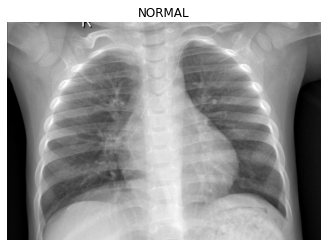

In [ ]:
# View a random image
train_dir = './chest_xray_data/train'
test_dir = './chest_xray_data/test'
validation_dir = './chest_xray_data/val'

import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+'/'+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img, cmap = "gray")
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

# classes = ['NORMAL', 'PNEUMONIA']
img = view_random_image(target_dir = test_dir, target_class = "NORMAL")
# img = tensorflow.constant(img)
plt.show()


In [ ]:
## Setting up the data

## Set the image size 
IMG_SIZE = (224, 224)
batchSize = 32

print("Training Images:")
train_data = tensorflow.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "binary",
                                                                 color_mode = "rgb",
                                                                 batch_size = batchSize)

print("Testing Images:")
test_data = tensorflow.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "binary",
                                                                 color_mode = "rgb",
                                                                 batch_size = batchSize)

print("Validation Images:")
val_data = tensorflow.keras.preprocessing.image_dataset_from_directory(directory = validation_dir,
                                                                 image_size = IMG_SIZE,
                                                                 label_mode = "binary",
                                                                 color_mode = "rgb",
                                                                 batch_size = batchSize)


Training Images:
Found 5216 files belonging to 2 classes.
Testing Images:
Found 624 files belonging to 2 classes.
Validation Images:
Found 16 files belonging to 2 classes.


In [ ]:
len(train_data),len(test_data),len(val_data)

(163, 20, 1)

In [ ]:
train_data 

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>

(32, 224, 224, 3) tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]
 [0.]], shape=(5, 1), dtype=float32)


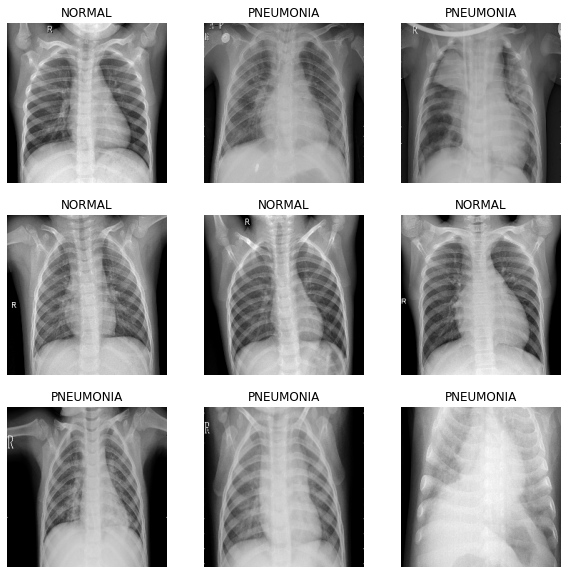

==================== Test dataset ====================
(32, 224, 224, 3) tf.Tensor(
[[0.]
 [0.]
 [1.]
 [0.]
 [1.]], shape=(5, 1), dtype=float32)


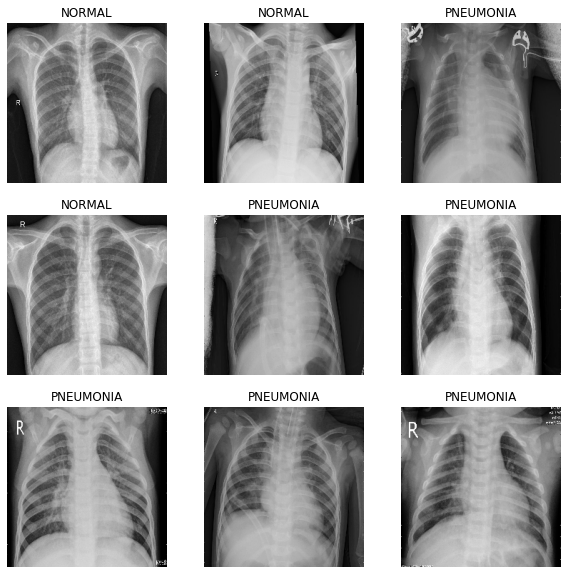

In [ ]:
# Plot images from dataset
# figure 크기를 조절합니다.
plt.figure(figsize=(10, 10))
names = ['NORMAL', 'PNEUMONIA']
# 배치 하나를 가져옵니다.
for images, labels in train_data.take(1):
    print(images.shape, labels[:5])
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i][:,:,0].numpy().astype("uint8"), cmap = "gray") #.numpy())
        plt.title(names[int(labels[i])])
        plt.axis("off")
plt.show()

# [DIY] Plot images from test dataset
print("="*20, 'Test dataset', "="*20)
plt.figure(figsize=(10, 10))
# names = ['NORMAL', 'PNEUMONIA']
# 배치 하나를 가져옵니다.
for images, labels in test_data.take(1):
    print(images.shape, labels[:5])
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i][:,:,0].numpy().astype("uint8"), cmap = "gray") #.numpy())
        plt.title(names[int(labels[i])])
        plt.axis("off")
plt.show()


In [ ]:
#
# Data augmentation
#
# Create a data augmentation stage with horizontal flipping, rotations, zooms
#
tensorflow.get_logger().setLevel('ERROR')  # Clear warnings in data augmentation

from tensorflow import keras
data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),  # Not compatible with model
  layers.RandomWidth(0.2),
  #layers.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")


========================= Train dataset =========================
tf.Tensor(
[[1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]], shape=(32, 1), dtype=float32) (32, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


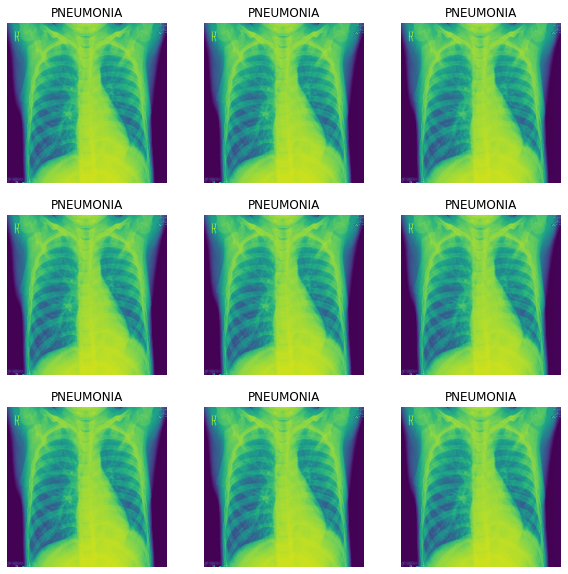

========================= Test dataset =========================
tf.Tensor(
[[1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]], shape=(32, 1), dtype=float32) (32, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)
(1, 224, 224, 3)


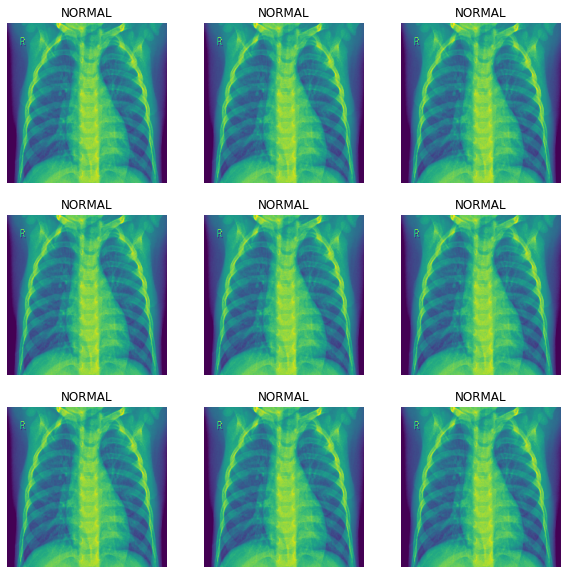

In [ ]:
#
# Visualize the augmented images
#
print("="*25, 'Train dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 5
for images, labels in train_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0][:,:,0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

print("="*25, 'Test dataset', "="*25)
plt.figure(figsize=(10,10))
image_idx = 5
for images, labels in test_data.take(1):    # Make a batch of images & labels
    print(labels,images.shape)
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        aug_img = data_augmentation(tensorflow.expand_dims(images[image_idx], axis=0))
        print(aug_img.shape)
        plt.imshow(aug_img[0][:,:,0].numpy().astype("uint8"))
        plt.title("{}".format(names[int(labels[image_idx])]))
        plt.axis("off")
    break
plt.show()

### **model Resnet50**

In [ ]:

base_model = keras.applications.resnet50.ResNet50(weights = "imagenet", input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top=False)
# weights='imagenet, include_top = False, weights = "imagenet", input_shape = (IMG_SIZE, IMG_SIZE, 1), 
base_model.trainable = True 
# Check the input and output of the pretraioned model
print(base_model.input.shape)
print(base_model.output.shape)

for layer_number, layers in enumerate(base_model.layers):
  print(layer_number, layers.trainable, end=", ")


TypeError: ignored

In [ ]:
model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(512,activation=tensorflow.nn.relu),
    tensorflow.keras.layers.Dropout(0.2),
    tensorflow.keras.layers.Dense(1,activation=tensorflow.nn.sigmoid),
    layers.Input(shape=(224,224,1), name='input_layer'),
    layers.Rescaling(1./255),
    data_augmentation,
    base_model,
    layers.GlobalMaxPooling2D(name = "global_max"),
    layers.Dense(128,activation='relu'),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer= "adam", 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

model.summary()

#ix = layer.Input(shape=(224,224,1))
#print(base_model(ix))

#model.summary()

AttributeError: ignored

In [ ]:

model = keras.Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable = False
    
model.add(Flatten())

model.add(Dense(units = 128, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = "sigmoid"))

ix=layers.Input(shape=(224,224,1))
print(base_model(ix))
  


ValueError: ignored